In [1]:
import walk
from experiment import MultipleExperiment
import tests
import fitter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def wf(weight):
    return weight ** (-1)

test = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=10000, length=100, chunk_size=100, weight_function=wf)
test.run()

100%|██████████| 10000/10000 [00:27<00:00, 360.28it/s]


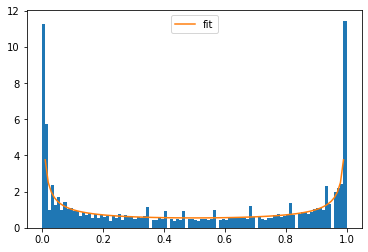

In [3]:
f = fitter.BetaFitter(test.stats['ta0'])
f.fit([1/2], 'trf')
f.plot(100)

In [4]:
f.params

array([0.40319824])

In [2]:
def wf(weight):
    return 1 + 1/weight

test2 = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=10000, length=100, chunk_size=100, weight_function=wf)
test2.run()

100%|██████████| 10000/10000 [00:36<00:00, 271.77it/s]


[0.42601318]


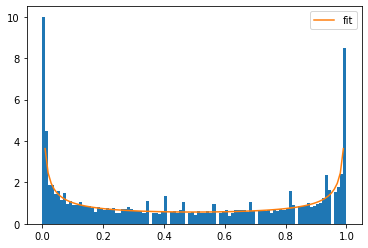

In [3]:
f2 = fitter.BetaFitter(test2.stats['ta0'])
f2.fit([0.15], 'trf')
f2.plot(100)

In [4]:
f2.params

array([0.42601318])